# Readme

## Project: Music genre classification
### Librosa,scikit learn are the required libraries.
### dataset is downloaded from http://marsyas.info/downloads/datasets.html
### Feature extraction is carried out.
### AIM: To classify music genre in the given dataset
### Problem formulation: Supervised multi class classification problem.

In [7]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
#import keras
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, train_test_split 
from sklearn import svm 
from sklearn.metrics import accuracy_score
from python_speech_features import mfcc
from python_speech_features import logfbank


# Dataset consists of 10 classes and each class consists of 100 same kind of audio files.


In [8]:
header = 'filename chroma_stft  spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

## data.csv is an file which has feature extracted information with proper headings.

In [9]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

In [10]:
data = pd.read_csv('data.csv')
data.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label


### Raw audio data is read using librosa.read() which returns sampled values and sampling rate.

#### 1)STFT(Short time fourier transform)
#### 2)Spectral centroid
#### 3)spectral bandwidth
#### 4)Zero crossing rate
#### 5)Spectral roll off
#### 6)Zero crossing rate
#### 7)MFCC's(Mel frequency cepstral coefficients)

#### These are the features used to train the model

In [11]:
for g in genres:
    for filename in os.listdir(f'./genres/{g}'):
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
       
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)}  {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

### Note: To find mfcc's entire audio is segmented into 20 segments and mean of each segments are used as features.

In [12]:
data = pd.read_csv('data.csv')
data.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,...,5.376803,-2.239120,4.216963,-6.012273,0.936109,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [13]:
data = data.drop(['filename'],axis=1)
data.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,-6.376458,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,0.340983,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,2.916037,...,5.376803,-2.239120,4.216963,-6.012273,0.936109,-0.716537,0.293876,-0.287431,0.531573,blues
2,0.363603,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,-13.987036,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,0.404779,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,1.754462,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,0.308590,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,-32.489269,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [14]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

# In the below cell X is used for data instantiation purpose rather than using individual coloums

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

## without using Kfold accuracy is more than with using.

In [16]:
#kf = KFold(n_splits=5) 
dataset, test_dataset, targets, test_targets  = train_test_split(X, y, test_size=0.2,random_state=40)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
#from sklearn.linear_model import C

In [31]:

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=0, C=8))
    ])

In [32]:
svclassifier = SVC(kernel='rbf')

### below code is used for kfold purpose

In [33]:
"""for train_index, test_index in kf.split(dataset):
    train_dataset, validation_dataset = dataset[train_index],dataset[test_index] 
    train_labels, validation_labels = targets[train_index], targets[test_index]
    poly_kernel_svm_clf.fit(train_dataset, train_labels) 
    svclassifier.fit(train_dataset, train_labels) """
    


    


'for train_index, test_index in kf.split(dataset):\n    train_dataset, validation_dataset = dataset[train_index],dataset[test_index] \n    train_labels, validation_labels = targets[train_index], targets[test_index]\n    poly_kernel_svm_clf.fit(train_dataset, train_labels) \n    svclassifier.fit(train_dataset, train_labels) '

## Gaussian,Polynomial kernels are primarly used.

In [34]:
poly_kernel_svm_clf.fit(dataset, targets) 
svclassifier.fit(dataset, targets)

SVC()

0.64


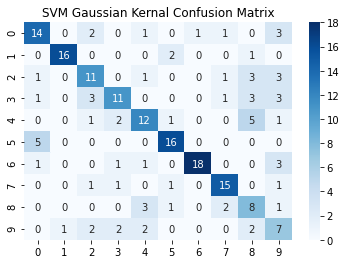

In [35]:
import seaborn as sns
y_pred = svclassifier.predict(test_dataset)
svclassifier_matrix = confusion_matrix( svclassifier.predict(test_dataset), test_targets) 
sns.heatmap( svclassifier_matrix, annot=True, cmap="Blues") 
plt.title("SVM Gaussian Kernal Confusion Matrix") 
print(accuracy_score(test_targets,  svclassifier.predict(test_dataset)))



0.695


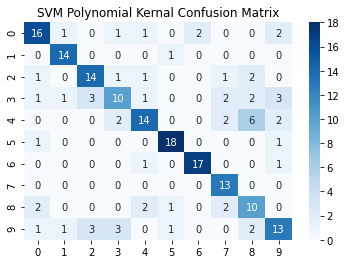

In [36]:
poly_kernel_svm_cf_matrix = confusion_matrix(poly_kernel_svm_clf.predict(test_dataset), test_targets) 
sns.heatmap(poly_kernel_svm_cf_matrix, annot=True, cmap="Blues") 
plt.title("SVM Polynomial Kernal Confusion Matrix") 
print(accuracy_score(test_targets, poly_kernel_svm_clf.predict(test_dataset)))

# below cells show train accuracy

0.9525


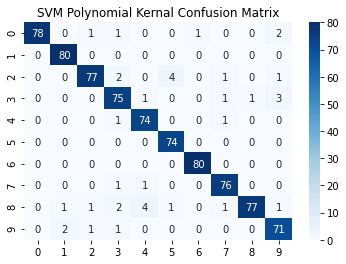

In [40]:
poly_kernel_svm_cf_matrix = confusion_matrix(poly_kernel_svm_clf.predict(dataset), targets) 
sns.heatmap(poly_kernel_svm_cf_matrix, annot=True, cmap="Blues") 
plt.title("SVM Polynomial Kernal Confusion Matrix") 
print(accuracy_score(targets, poly_kernel_svm_clf.predict(dataset)))

0.7975


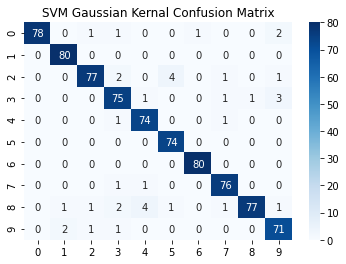

In [41]:
y_pred = svclassifier.predict(dataset)
svclassifier_matrix = confusion_matrix(poly_kernel_svm_clf.predict(dataset), targets)  
sns.heatmap( svclassifier_matrix, annot=True, cmap="Blues") 
plt.title("SVM Gaussian Kernal Confusion Matrix") 
print(accuracy_score(targets,  svclassifier.predict(dataset)))


# Result analysis:  Human level of genre classification is only upto 80% therefore any model incliding convolutional nueral networks has accuracy in between 70-75%



# references
## https://towardsdatascience.com/musical-genre-classification-with-convolutional-neural-networks-ff04f9601a74

## https://www.kaggle.com/c/music-genre-classification/leaderboard

## http://cs229.stanford.edu/proj2018/report/21.pdf

## Mingwen Dong. Convolutional neural network achieves human-level accuracy in music genre classification. CoRR,

